<a href="https://colab.research.google.com/github/suryarisa113/PRATIKUM-1-G.231.21.0045/blob/main/Praktikum_4_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as opt
from sklearn import preprocessing

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn

from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham.csv


In [ ]:
#dataset
disease_df = pd.read_csv('framingham.csv')
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'sex_male'}, inplace = True)

#removing Nan / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

   sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

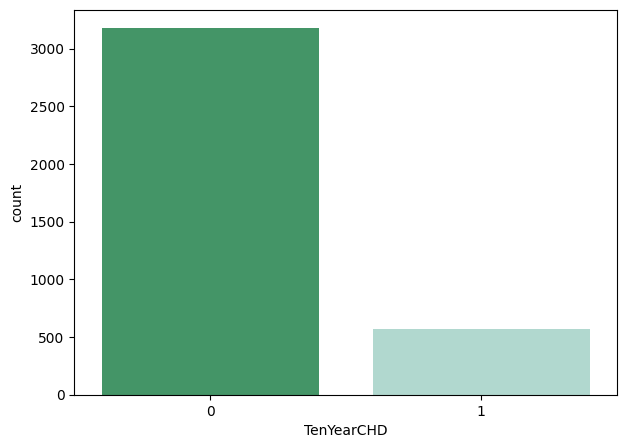

In [ ]:
#counting no. of patiensts affected with CHD
plt.figure(figsize=(7, 5))
sn.countplot(x='TenYearCHD', data=disease_df,
             palette="BuGn_r")
plt.show()


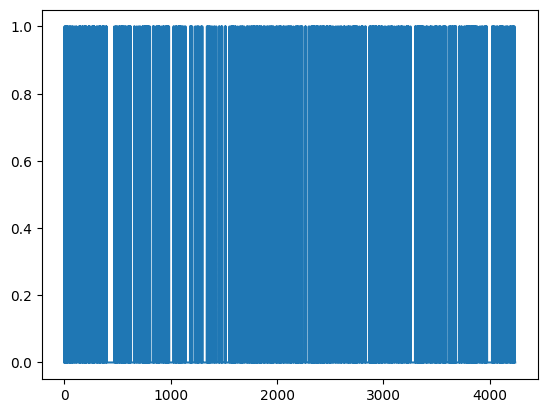

In [ ]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

In [ ]:
x = np.asarray(disease_df[['age', 'sex_male', 'cigsPerDay',
                           'totChol', 'sysBP', 'glucose',]])
y = np.asarray(disease_df['TenYearCHD'])

# normalization of the dataset
x = preprocessing.StandardScaler().fit(x).transform(x)

# Train-and-test-split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.3, random_state= 4)

print('Train set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

#Evalution and accuracy
from sklearn.matrics import jaccard_similarity_score

print('')
print('Accuracy of the model in jaccard similarity score is = ')


ModuleNotFoundError: ignored